In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
white_path = "wine-white.csv"
red_path = "wine-red.csv"

def import_merge_df(file_name1, file_name2):
    df1 = pd.read_csv(file_name1)
    df2 = pd.read_csv(file_name2)
    print(df1.shape)
    print(df2.shape)
    # merge the dataframes 
    df = pd.concat([df1, df2], ignore_index=True)
    return df


df = import_merge_df(red_path, white_path)
df

(1599, 12)
(4898, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


### Setup data

Tested a few seeds to find one where the quality median and mean was similar in the training set and testing set. The median did not give us any meaningful insight into the seed. The range of quality values was small so all of the seeds ended up having the same median. We ended up using the mean to determine which seed we should use.  

In [11]:
# generate features and labels
features = df.drop('quality', 1)
labels = df['quality']
# The median didn't tell us much about the data set, labels are pretty narrow. 
print(labels.name+ ' median')
print(labels.median())


# reported and reviewed the mean as well
print(labels.name+ ' mean')
print(labels.mean())

# optimize seeds so the test and train data has similar mean quality
def test_seeds():
    test_prop = 0.25
#     seed = 23
    seeds = range(3000, 3010)
    for seed in seeds:
        X_train, X_test, y_train, y_test = train_test_split(features, labels, 
                                                        test_size = test_prop, random_state = seed)
        
        # change this to median
        print(seed)
        print('train median: %d , test median: %d , train mean: %f , test mean: %f ' 
              % (y_train.median(), y_test.median(), y_train.mean(), y_test.mean()))

        
test_seeds()

quality median
6.0
quality mean
5.818377712790519
3000
train median: 6 , test median: 6 , train mean: 5.825123 , test mean: 5.798154 
3001
train median: 6 , test median: 6 , train mean: 5.818350 , test mean: 5.818462 
3002
train median: 6 , test median: 6 , train mean: 5.817118 , test mean: 5.822154 
3003
train median: 6 , test median: 6 , train mean: 5.821223 , test mean: 5.809846 
3004
train median: 6 , test median: 6 , train mean: 5.817529 , test mean: 5.820923 
3005
train median: 6 , test median: 6 , train mean: 5.814450 , test mean: 5.830154 
3006
train median: 6 , test median: 6 , train mean: 5.821839 , test mean: 5.808000 
3007
train median: 6 , test median: 6 , train mean: 5.824507 , test mean: 5.800000 
3008
train median: 6 , test median: 6 , train mean: 5.829844 , test mean: 5.784000 
3009
train median: 6 , test median: 6 , train mean: 5.812192 , test mean: 5.836923 


In [12]:
# use 3001 as the seed

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = 0.25, 
                                                    random_state = 3001)

alphas = np.arange(0.0,10.1,0.1)
print(alphas)

[ 0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1.   1.1  1.2  1.3
  1.4  1.5  1.6  1.7  1.8  1.9  2.   2.1  2.2  2.3  2.4  2.5  2.6  2.7
  2.8  2.9  3.   3.1  3.2  3.3  3.4  3.5  3.6  3.7  3.8  3.9  4.   4.1
  4.2  4.3  4.4  4.5  4.6  4.7  4.8  4.9  5.   5.1  5.2  5.3  5.4  5.5
  5.6  5.7  5.8  5.9  6.   6.1  6.2  6.3  6.4  6.5  6.6  6.7  6.8  6.9
  7.   7.1  7.2  7.3  7.4  7.5  7.6  7.7  7.8  7.9  8.   8.1  8.2  8.3
  8.4  8.5  8.6  8.7  8.8  8.9  9.   9.1  9.2  9.3  9.4  9.5  9.6  9.7
  9.8  9.9 10. ]


## Q1 can we use these features to predict the quality of the wine 

### Now we will use various regression models and alpha parameters to determine which is the most effective.
- We will evaluate each model using scaled and non scaled data to compare the results. 

## Linear Regression

In [30]:
lr = LinearRegression().fit(X_train, y_train)
print("Training set score: %f" % lr.score(X_train, y_train))
print("Testing set score: %f" % lr.score(X_test, y_test))
lr_score_train = lr.score(X_train, y_train)
lr_score_test = lr.score(X_test, y_test)
print(lr_score_train)

Training set score: 0.297718
Testing set score: 0.273965
0.2977184292827678


##  Linear Regression Scaled

In [29]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

sc_lr = LinearRegression().fit(X_train_scaled, y_train)
print("Training set score: %f" % sc_lr.score(X_train_scaled, y_train))
print("Testing set score: %f" % sc_lr.score(X_test_scaled, y_test))
sc_lr_score_train = sc_lr.score(X_train_scaled, y_train)
sc_lr_score_test = sc_lr.score(X_test_scaled, y_test)
print(sc_lr_score_train)

Training set score: 0.297718
Testing set score: 0.273965
0.2977184292827679


### Results
- We saw no difference between linear regression models with the scaled data or the orginal data

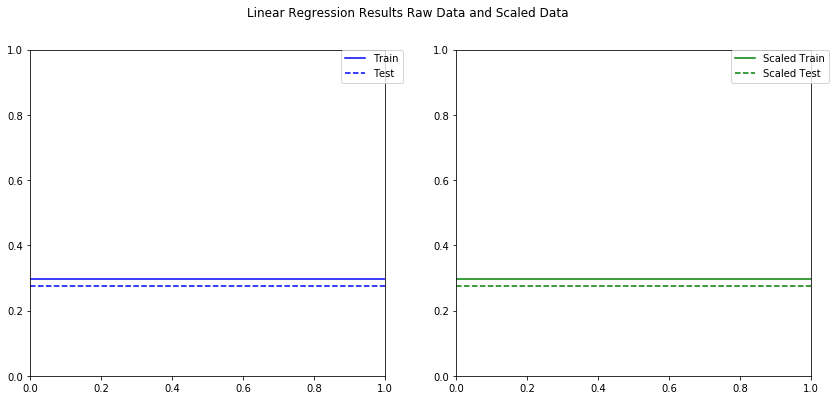

In [40]:
# figure of scaled and non scaled
def plot_lr_data(d1,d2,d3,d4):
    
    f, ax = plt.subplots(1, 1, figsize = (14,6))
    plt.subplot(121)
    plt.axhline(d1, c='b', linestyle='-', label= 'Train')
    plt.axhline(d2, c='b', linestyle='--', label= 'Test')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper right', borderaxespad=0.)
    plt.suptitle("Linear Regression Results Raw Data and Scaled Data")
    plt.subplot(122)
    plt.axhline(d3, c='g', linestyle='-', label= 'Scaled Train')
    plt.axhline(d4, c='g', linestyle='--', label= 'Scaled Test')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper right', borderaxespad=0.)

    plt.show()
    
plot_lr_data(lr_score_train, lr_score_test, sc_lr_score_train, sc_lr_score_test)


### Next we will use different regression models and iterate through alpha parameters to find the best result. 
- The alpha parameters are used to help avoid overfitting the data to the training set. This should help improve the accuracy on the testing set. 

## Ridge and Ridge with Scaled Data

In [18]:
ridge_tr_score = list()
ridge_tst_score = list()
sc_ridge_tr_score = list()
sc_ridge_tst_score = list()
for alpha in alphas:
    print('alpha: %.2f' %alpha)
    ridge = Ridge(alpha = alpha).fit(X_train, y_train)
    print("Training set score: %f" % ridge.score(X_train, y_train))
    ridge_tr_score.append(ridge.score(X_train, y_train))
    print("Testing set score: %f" % ridge.score(X_test, y_test))
    ridge_tst_score.append(ridge.score(X_test, y_test))
    
    ridge = Ridge(alpha = alpha).fit(X_train_scaled, y_train)
    print("Scaled training set score: %f" % ridge.score(X_train_scaled, y_train))
    sc_ridge_tr_score.append(ridge.score(X_train_scaled, y_train))
    print("Scaled testing set score: %f" % ridge.score(X_test_scaled, y_test))
    sc_ridge_tst_score.append(ridge.score(X_test_scaled, y_test))
   
print('The best result for Ridge was: %.4f' % max(ridge_tst_score))

alpha: 0.00
Training set score: 0.297718
Testing set score: 0.273965
Scaled training set score: 0.297718
Scaled testing set score: 0.273965
alpha: 0.10
Training set score: 0.295254
Testing set score: 0.272793
Scaled training set score: 0.297678
Scaled testing set score: 0.273980
alpha: 0.20
Training set score: 0.295183
Testing set score: 0.272747
Scaled training set score: 0.297586
Scaled testing set score: 0.273932
alpha: 0.30
Training set score: 0.295157
Testing set score: 0.272728
Scaled training set score: 0.297472
Scaled testing set score: 0.273849
alpha: 0.40
Training set score: 0.295141
Testing set score: 0.272716
Scaled training set score: 0.297350
Scaled testing set score: 0.273749
alpha: 0.50
Training set score: 0.295129
Testing set score: 0.272704
Scaled training set score: 0.297225
Scaled testing set score: 0.273639
alpha: 0.60
Training set score: 0.295119
Testing set score: 0.272693
Scaled training set score: 0.297103
Scaled testing set score: 0.273525
alpha: 0.70
Training

Training set score: 0.294499
Testing set score: 0.271200
Scaled training set score: 0.292506
Scaled testing set score: 0.267800
alpha: 6.50
Training set score: 0.294486
Testing set score: 0.271169
Scaled training set score: 0.292427
Scaled testing set score: 0.267704
alpha: 6.60
Training set score: 0.294474
Testing set score: 0.271138
Scaled training set score: 0.292348
Scaled testing set score: 0.267608
alpha: 6.70
Training set score: 0.294462
Testing set score: 0.271107
Scaled training set score: 0.292269
Scaled testing set score: 0.267512
alpha: 6.80
Training set score: 0.294450
Testing set score: 0.271076
Scaled training set score: 0.292189
Scaled testing set score: 0.267416
alpha: 6.90
Training set score: 0.294438
Testing set score: 0.271045
Scaled training set score: 0.292110
Scaled testing set score: 0.267320
alpha: 7.00
Training set score: 0.294425
Testing set score: 0.271014
Scaled training set score: 0.292030
Scaled testing set score: 0.267223
alpha: 7.10
Training set score: 

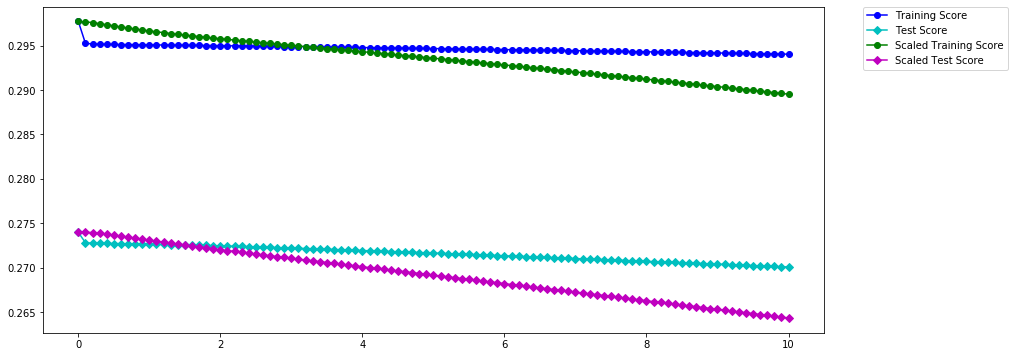

In [46]:
# plot the scaled and non scaled

def plot_lr_alphas(d1,d2,d3,d4,labels):
    f, ax = plt.subplots(1, 1, figsize = (14,6))
    plt.plot(labels, d1, 'b', marker='o', label='Training Score')
    plt.plot(labels, d2, 'c', marker='D', label='Test Score')
    plt.plot(labels, d3, 'g', marker='o', label='Scaled Training Score')
    plt.plot(labels, d4, 'm', marker='D', label='Scaled Test Score')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.show()

plot_lr_alphas(ridge_tr_score, ridge_tst_score, sc_ridge_tr_score, sc_ridge_tst_score, alphas)

### Results
- With ridge regularization the scaled test scores performed better with alpha values below 1.8. After that point the model with the reaw feature data performed better. 
- We also saw that as the training accuracy went down so did the testing accuracy. This indicates that overfitting was not really a problem. Our models low performance score is more so based on how well these features can be used to predict the wine quality. 

## Lasso and Lasso with Scaled Data
- We printed out the number of coefficients to see how many were set to zero with L1 regularization

In [48]:
lasso_tr_score = list()
lasso_tst_score = list()
sc_lasso_tr_score = list()
sc_lasso_tst_score = list()
for alpha in alphas:
    print(alpha)
    lasso = Lasso(alpha = alpha, max_iter = 100000).fit(X_train, y_train)
    print("Training set score: %f" % lasso.score(X_train, y_train))
    lasso_tr_score.append(lasso.score(X_train, y_train))
    print("Testing set score: %f" % lasso.score(X_test, y_test))
    lasso_tst_score.append(lasso.score(X_test, y_test))
        
    print("Number of features: %d" % np.sum(lasso.coef_ != 0))
    
    sc_lasso = Lasso(alpha = alpha, max_iter = 100000).fit(X_train_scaled, y_train)
    print("Scaled training set score: %f" % sc_lasso.score(X_train_scaled, y_train))
    sc_lasso_tr_score.append(sc_lasso.score(X_train_scaled, y_train))
    print("Scaled testing set score: %f" % sc_lasso.score(X_test_scaled, y_test))
    sc_lasso_tst_score.append(sc_lasso.score(X_test_scaled, y_test))
    
    print("Number of features: %d" % np.sum(sc_lasso.coef_ != 0))
    
    
print(max(lasso_tst_score))

0.0


C:\Users\kfrie\anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  import sys
C:\Users\kfrie\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
C:\Users\kfrie\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1287.3662285861856, tolerance: 0.36662395320197044
  positive)
C:\Users\kfrie\anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  from ipykernel import kernelapp as app
C:\Users\kfrie\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476

Training set score: 0.297718
Testing set score: 0.273965
Number of features: 11


C:\Users\kfrie\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1287.3662285862229, tolerance: 0.36662395320197044
  positive)


Scaled training set score: 0.297718
Scaled testing set score: 0.273965
Number of features: 11


0.1
Training set score: 0.223449
Testing set score: 0.188475
Number of features: 4
Scaled training set score: 0.000000
Scaled testing set score: -0.000000
Number of features: 0


0.2
Training set score: 0.187850
Testing set score: 0.160419
Number of features: 3
Scaled training set score: 0.000000
Scaled testing set score: -0.000000
Number of features: 0


0.30000000000000004
Training set score: 0.137403
Testing set score: 0.119373
Number of features: 3
Scaled training set score: 0.000000
Scaled testing set score: -0.000000
Number of features: 0


0.4
Training set score: 0.066794
Testing set score: 0.058791
Number of features: 3
Scaled training set score: 0.000000
Scaled testing set score: -0.000000
Number of features: 0


0.5
Training set score: 0.013828
Testing set score: 0.012310
Number of features: 2
Scaled training set score: 0.000000
Scaled testing set score: -0.000000
Number of feature

Testing set score: -0.000000
Number of features: 0
Scaled training set score: 0.000000
Scaled testing set score: -0.000000
Number of features: 0


4.9
Training set score: 0.000000
Testing set score: -0.000000
Number of features: 0
Scaled training set score: 0.000000
Scaled testing set score: -0.000000
Number of features: 0


5.0
Training set score: 0.000000
Testing set score: -0.000000
Number of features: 0
Scaled training set score: 0.000000
Scaled testing set score: -0.000000
Number of features: 0


5.1000000000000005
Training set score: 0.000000
Testing set score: -0.000000
Number of features: 0
Scaled training set score: 0.000000
Scaled testing set score: -0.000000
Number of features: 0


5.2
Training set score: 0.000000
Testing set score: -0.000000
Number of features: 0
Scaled training set score: 0.000000
Scaled testing set score: -0.000000
Number of features: 0


5.300000000000001
Training set score: 0.000000
Testing set score: -0.000000
Number of features: 0
Scaled training set 

Scaled testing set score: -0.000000
Number of features: 0


9.700000000000001
Training set score: 0.000000
Testing set score: -0.000000
Number of features: 0
Scaled training set score: 0.000000
Scaled testing set score: -0.000000
Number of features: 0


9.8
Training set score: 0.000000
Testing set score: -0.000000
Number of features: 0
Scaled training set score: 0.000000
Scaled testing set score: -0.000000
Number of features: 0


9.9
Training set score: 0.000000
Testing set score: -0.000000
Number of features: 0
Scaled training set score: 0.000000
Scaled testing set score: -0.000000
Number of features: 0


10.0
Training set score: 0.000000
Testing set score: -0.000000
Number of features: 0
Scaled training set score: 0.000000
Scaled testing set score: -0.000000
Number of features: 0


0.27396516758163214


### Alpha results
- Anything with and alpha higher than 1 gave us very poor results and as soon as the alpha was 1.2 or greater zero features were used so this is obviously not a good result. 
- We will exclude these scores and place them below. 

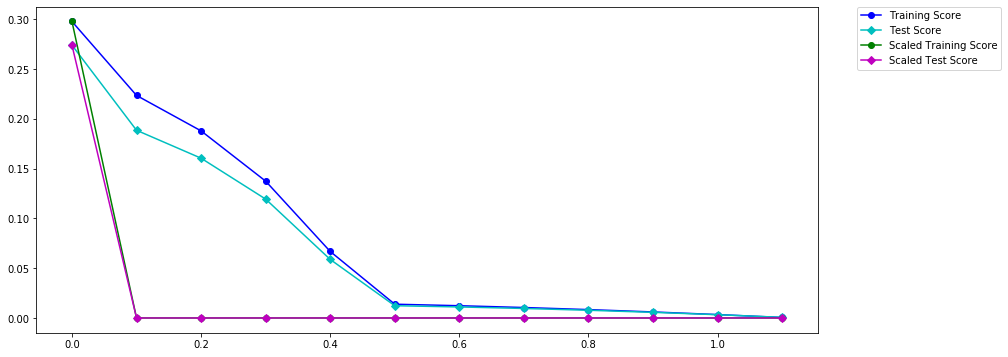

In [50]:

plot_lr_alphas(lasso_tr_score[:12], lasso_tst_score[:12], sc_lasso_tr_score[:12],
               sc_lasso_tst_score[:12], alphas[:12])

### Lasso Result discussion

### Visulaizations of the data, need to show the results for all 3 with and with out scaled data. 

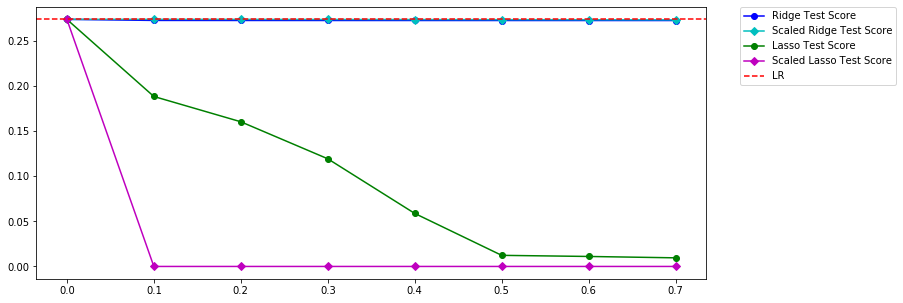

In [51]:
# print testing data for alphas up to 0.6
def plot_testing(d1,d2,d3,d4,d5,labels):
    f, ax = plt.subplots(1, 1, figsize = (12,5))
    plt.plot(labels, d1, 'b', marker='o', label='Ridge Test Score')
    plt.plot(labels, d2, 'c', marker='D', label='Scaled Ridge Test Score')
    plt.plot(labels, d3, 'g', marker='o', label='Lasso Test Score')
    plt.plot(labels, d4, 'm', marker='D', label='Scaled Lasso Test Score')
    plt.axhline(d5, c='r', linestyle='--', label= 'LR')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.show()
    
plot_testing(ridge_tst_score[:8], sc_ridge_tst_score[:8], lasso_tst_score[:8], 
             sc_lasso_tst_score[:8], lr_score_test, alphas[:8] )

### Discussion of what worked better to answer the question. 
- scaling didn't help
- lasso eliminated features with alpha above 0 this decreased accuracy